# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [2]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name(locale='uk_UA')
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [5]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Субота,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Субота,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Субота,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Субота,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Субота,2011,1,4


In [4]:
df.shape

(10886, 19)

In [5]:
df.memory_usage().sum()

np.int64(1491382)

In [6]:
round(float(df.memory_usage().sum()/(1024**2)), 2)

1.42

Дані містять **10886 рядків** та **19 стовпців**.   
В цілому дані займають **1.42 MB**.   
Рівень деталізації — **погодинний**, тобто кожен рядок містить дані за одну годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


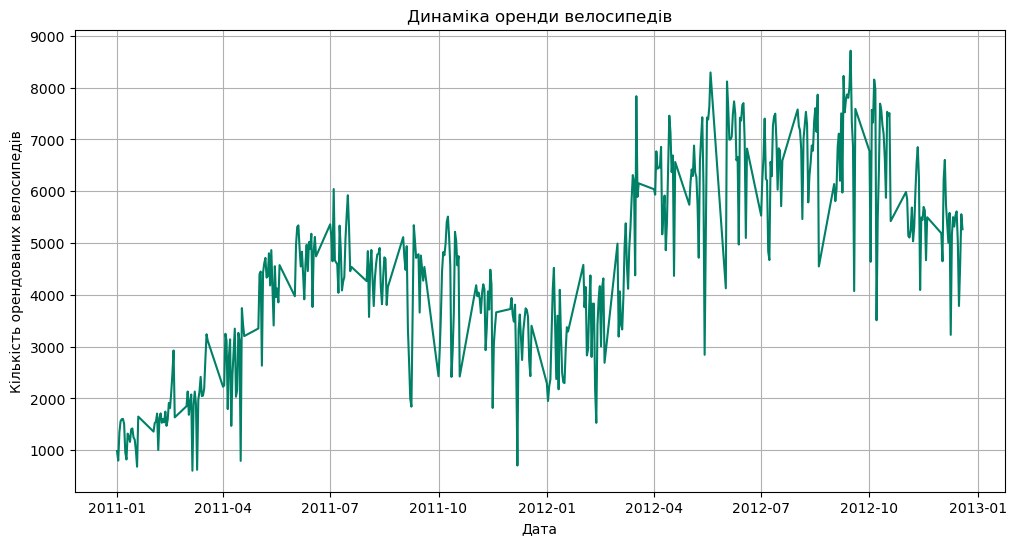

In [7]:
daily_count = df.groupby('date')['count'].sum()
daily_count.plot(
    figsize=(12, 6),
    colormap='summer',
    title = 'Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість орендованих велосипедів',
    grid = True
);

**1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?**  
    Дані щоденні й досить нестабільні. Кількість оренд сильно змінюється день від дня — робочі дні, вихідні, погода, свята.
    Це природно створює різкі коливання.  
    Як прибрати: згладжування (rolling, mean) або тренд-лінія.  
**2. Які загальні тенденції ви бачите на графіку?**   
     Кількість оренд зростає від початку 2011 до кінця 2012 року, отже ринок росте, сервіс стає популярнішим, попит збільшується.  
**3. Чи помітні якісь сезонні коливання?**.   
    Так, спостерігається сезонність. У 2011 та 2012 роках з травня по жовтень видно високі значення, зима — просідання, тобто в холодні місяці прокати зменшуються (низькі піки, нижча середня кількість) - коротший світловий день, туман, низька видимість.   
    Сезонність дуже сильна, типова для велосипедного бізнесу.  
**4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?**.  
    *- Аномально низькі значення (падіння інколи до значень ~500–1000).*  
        Можливі причини: погана погода (дощ, сніг), свята, технічні збої.   
    *- Аномально високі значення (піки понад 8000 у 2012 році).*   
        Можливі причини: дуже теплі або сонячні дні, вихідні з хорошою погодою, події в місті (фестивалі, велопробіги)


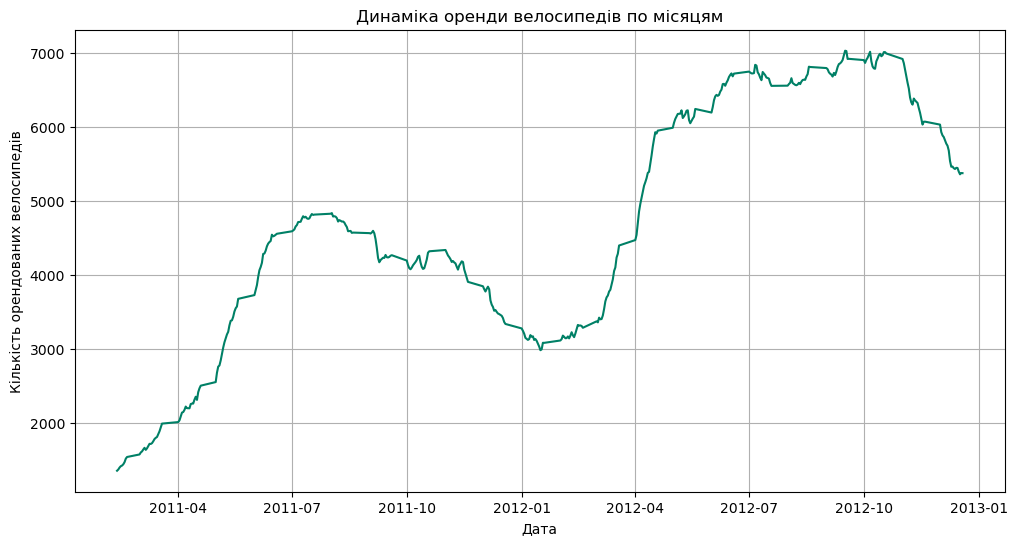

In [8]:
# Згладжування
weekly_count = daily_count.rolling(window=30).mean()
weekly_count.plot(
    figsize=(12, 6),
    colormap='summer',
    title = 'Динаміка оренди велосипедів по місяцям',
    xlabel='Дата',
    ylabel='Кількість орендованих велосипедів',
    grid = True
);


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [9]:
def get_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8, 9]:
        return 3
    else:
        return 4
df['weather_season_india'] = df['month'].apply(get_season)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,weather_season_india
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Субота,2011,1,0,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Субота,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Субота,2011,1,2,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Субота,2011,1,3,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Субота,2011,1,4,1


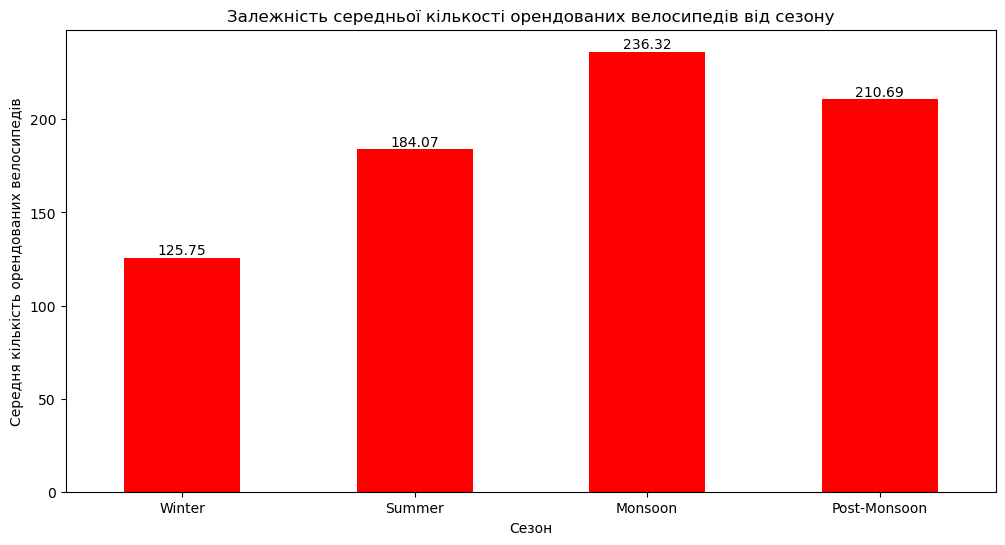

In [45]:
season_mean = df.groupby('weather_season_india', observed=True)['count'].mean()
ax=season_mean.plot(
    kind='bar',
    colormap='autumn',
    figsize=(12, 6),
    title='Залежність середньої кількості орендованих велосипедів від сезону',
    xlabel='Сезон',
    ylabel='Середня кількість орендованих велосипедів'
)
ax.set_xticklabels(['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'])
for i, v in enumerate(season_mean):
    plt.text(i, v, str(f'{v:.2f}'), fontsize=10, ha = 'center', va = 'bottom')
    plt.xticks(rotation=0);

**1.В який сезон найбільша середня кількість оренди велосипедів?**.  
Найбільша середня кількість оренди велосипедів — у сезон **Monsoon (сезон 3): ~236.32 оренд**.   

**2. Як ви можете пояснити таку сезонну закономірність?**.    
    - **Monsoon** у Індії часто означає не зливи щодня, а період вологої, теплої погоди, коли багато днів досить комфортні для поїздок:
    
            * дощі не щодня, часто короткочасні;   
            * температура в цей період комфортніша, ніж у спекотні літні місяці;   
            * люди продовжують активно пересуватися містом — велосипеди дешеві й популярні.   
Тому для транспортних даних Індїї нормально, що **літо  - менше, мусон - більше.**.  
    - **Після мусону** погода ще тепла, але без таких піків попиту, тому сезон Post-Monsoon трохи нижчий за Monsoon.   
    - **Літо** дуже спекотне, тому кількість оренд нижча — люди уникають перегріву (+35…+45°C, висока сонячна активність).   
    - **Взимку** прохолодно (10–20°C), часті туман, з низькою видимістю,коротший світловий день.       
     
    
**3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?**.  
Рівень оренд у найпопулярніший сезон (**Monsoon**) приблизно в 1.88 рази вищий, ніж у найменш популярний (**Winter**), що свідчить про помітну сезонність у використанні велосипедів.

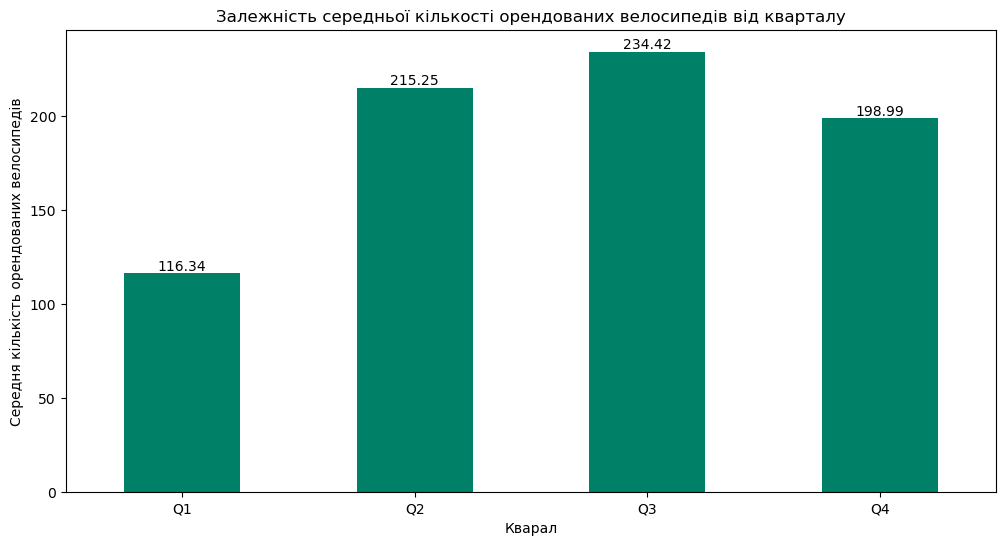

In [44]:
quarter_mean = df.groupby('season')['count'].mean()
ax = quarter_mean.plot.bar(
    figsize=(12, 6),
    title='Залежність середньої кількості орендованих велосипедів від кварталу',
    xlabel='Кварал',
    ylabel='Середня кількість орендованих велосипедів',
    colormap='summer'
)
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
for i, v in enumerate(quarter_mean):
    plt.text(i, v, str(f'{v:.2f}'), fontsize=10, ha = 'center', va = 'bottom')
    plt.xticks(rotation=0);
plt.xticks(rotation=0);

**1.В який квартал найбільша середня кількість оренди велосипедів?**.  
Найбільша середня кількість оренди велосипедів третій квартал **Q3: ~234.42 оренд**.   

**2. Як ви можете пояснити таку закономірність?**.    
 Q1(зима) - найнижча оренда (прохолодно, часті тумани, низька видимість).  
 Q2 - Q3 (весна, літо) - теплий сезон сприяє активності.  
 Q4 - невелике зниження, але все ще висока активність.
    
**3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?**.  
Рівень оренд у найпопулярніший квартал (**Q3**) приблизно в **2.02 рази** вищий, ніж у найменш популярний (**Q1**), що свідчить про помітну сезонність у використанні велосипедів.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


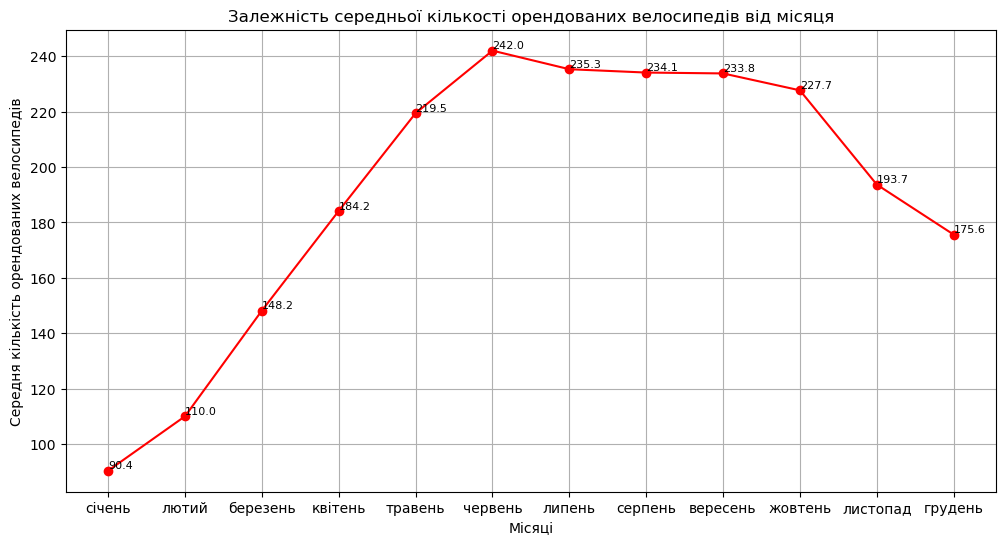

In [69]:
monthly_mean = df.groupby(['month'], observed=True)['count'].mean()
ax = monthly_mean.plot(
    figsize=(12, 6),
    color = 'red',
    marker = 'o',
    title = 'Залежність середньої кількості орендованих велосипедів від місяця',
    xlabel = 'Місяці',
    ylabel = 'Середня кількість орендованих велосипедів',
    grid = True
)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['січень','лютий','березень','квітень','травень','червень', 'липень','серпень','вересень','жовтень','листопад','грудень'])
plt.xticks(rotation=30);

for i, v in enumerate(monthly_mean):
    plt.text(i + 1, v, str(f'{v:2.1f}'), fontsize=8,  horizontalalignment='left', verticalalignment='bottom')
    plt.xticks(rotation=0);

**1. У які місяці спостерігається пік та спад оренди?**   
Пік оренди: **червень (≈ 242)**, дуже високі значення також у липні–вересні.  
Найнижчий рівень **січень (≈ 90)**, також низькі показники лютий, грудень, березень.  
**2. Чи збігається це з результатами з попереднього графіка по кварталах?**.  
Так, закономірність повністю збігається:   
	   •	У квартальному графіку пік припав на **Q3** - це відповідає липню–вересню на помісячному графіку.   
	   •	Найменша оренда була в **Q1 (початок року)** - це точно збігається із низькими показниками у січні та лютому.   
**3. Як клімат може впливати на оренду велосипедів протягом року?**. 
Клімат сильно формує сезонність:   
	•	Зима (холод + дощі) -  люди рідше катаються, оренда падає.   
	•	Весна та літо (тепло, сухо) - багато сонця, зручна погода, отже максимальна кількість оренд.  
    •.  Восени ще комфортно, але поступово стає холодніше, тому оренда знижується.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

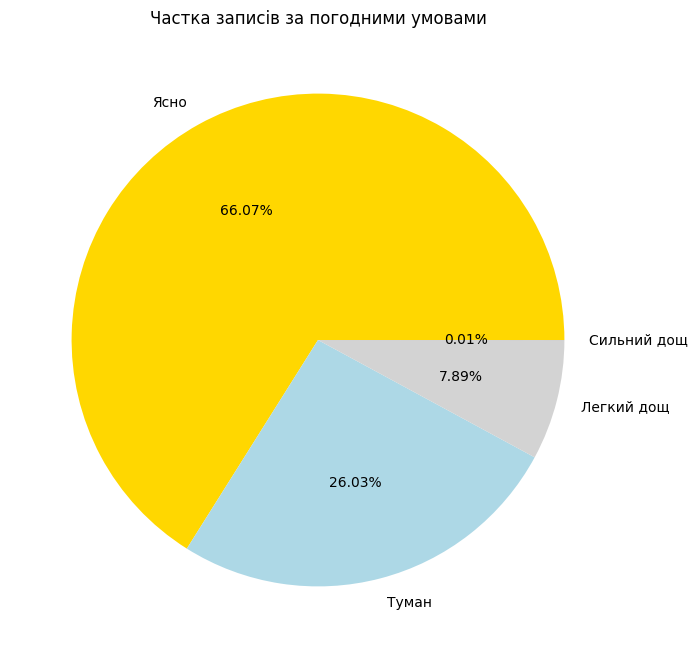

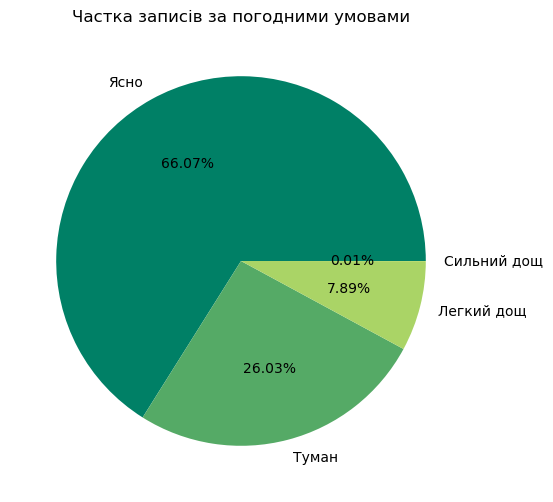

In [16]:
df.weather.value_counts(normalize=True).plot(
    kind = 'pie',
    figsize = (6, 6),
    autopct = '%1.2f%%',
    colormap='summer',
    title='Частка записів за погодними умовами',
    labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    ylabel=''
);

**1. Яка погода переважає в датасеті?**.   
Переважає ясна погода — її частка **66.07%** (це понад дві третини всіх записів).

**2. Чи є дні із сильним дощем? Яка їх частка?**

Так, сильний дощ є, але його частка дуже мало — лише **0.01%**, тобто це поодинокі випадки.

**3. Як погодні умови впливають на попит на оренду велосипедів?**.  
Загальна логіка така:   
    - Ясна погода  -  найвищий попит(люди найохочіше орендують велосипеди, коли сухо та комфортно).  
    - Туман  - помірний вплив (туман не заважає кататися, тому попит знижується, але не критично).   
    - Легкий дощ - помітне зниження попиту (люди уникають кататися по мокрому покриттю, бо це менш комфортно й безпечно).   
    - Сильний дощ - мінімальний або нульовий попит (кататися в сильний дощ небезпечно та неприємно, тому оренди різко падають).   
Отже, чим гірша погода, тим нижчий попит, і графік чітко показує, що в датасеті переважно гарна погода — ймовірно, тому оренд загалом багато.


## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

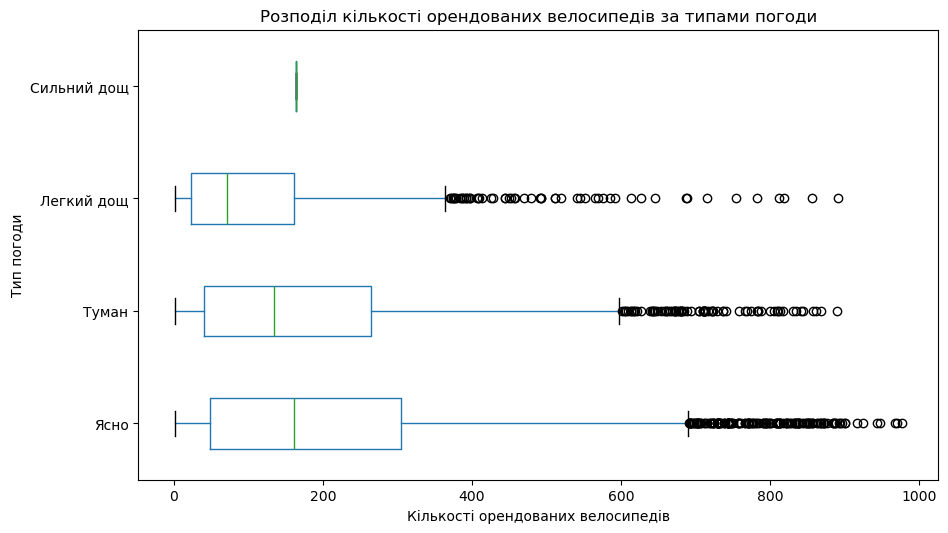

In [37]:
ax = df.boxplot(
    by ='weather',
    column = 'count',
    figsize=(10, 6),
    grid=False,
    vert=False
)
plt.title('Розподіл кількості орендованих велосипедів за типами погоди')
plt.suptitle('')
plt.xlabel('Кількості орендованих велосипедів')
plt.ylabel('Тип погоди')
ax.set_yticklabels(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']);

**1. При якій погоді найбільший розкид у кількості оренди?**  
Найбільший розкид при ясній погоді – коробка найдовша, розмах найбільший, і дуже багато викидів праворуч.

**2. Чи є викиди (outliers) в даних? При якій погоді?**  
Так, викидів багато.
Найбільше викидів у категорій: **ясно** — дуже багато точок далеко праворуч.  
Туман — багато викидів, але трохи менше, ніж при ясній погоді.   
Легкий дощ — теж є викиди, але їх менше.   
Сильний дощ — майже немає, бо даних мало.   

**3. При якій погоді медіанне значення оренди найвище?**    
Найвища медіана — при ясній погоді.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

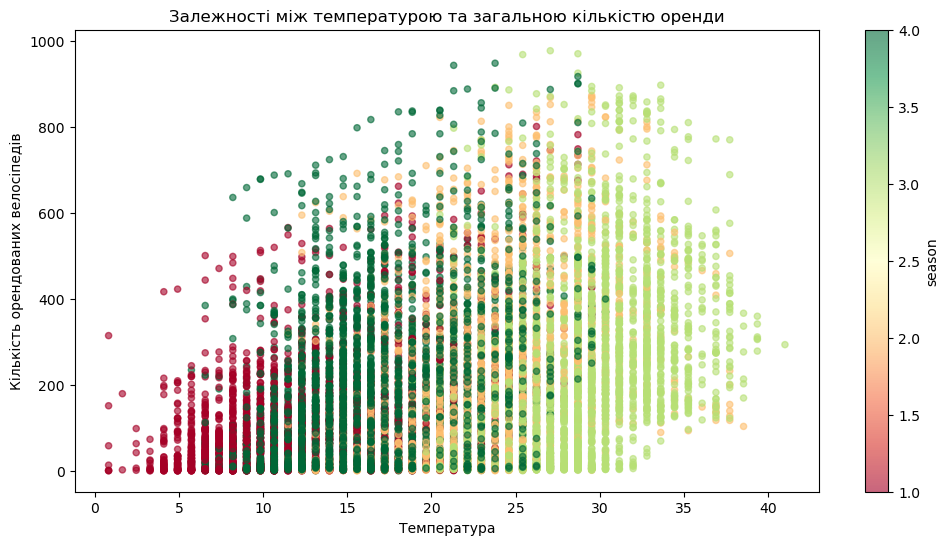

In [87]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    figsize = (12, 6),
    alpha=0.6,
    colormap='RdYlGn',
    title='Залежності між температурою та загальною кількістю оренди',
    xlabel='Температура',
    ylabel='Кількість орендованих велосіпедів'
);

**Чи є зв'язок між температурою та кількістю оренди? Який?**  
Так,  спостерігається зв'язок між температурою та кількістю оренди.

Наявна **позитивна кореляція**, тобто зі зростанням температури кількість орендованих велосипедів збільшується (це логічно, оскільки люди частіше катаються на велосипедах у теплу погоду).   
**Низька активність у холод**: при низьких температурах (**0 - 10 градусів**) кількість оренд є найнижчою.   
**Найбільша кількість оренд (800-1000)** спостерігається в діапазоні температур **20 - 30 градусів** (найбільш комфортна температура для велопрогулянок).
**Спад при сильній спеці**: При дуже високих температурах (**вище 30-35 градусі**в) щільність точок трохи зменшується, що може свідчити про те, що занадто сильна спека може дещо знижувати бажання орендувати велосипед, хоча попит залишається досить високим порівняно з холодними днями

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [70]:
day_of_week = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя']
df['weekday']=pd.Categorical(df['weekday'], day_of_week, ordered=True)

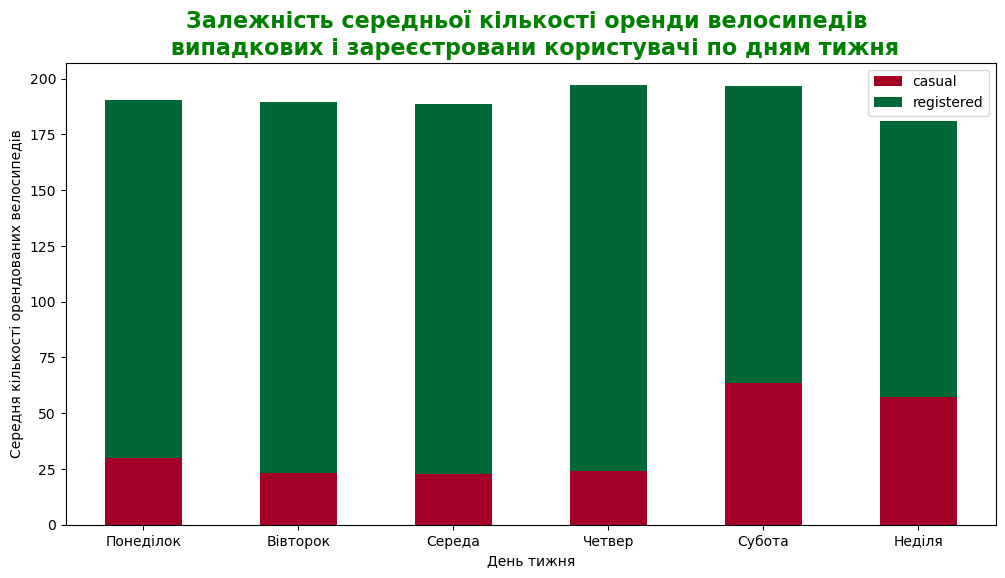

In [71]:
weekday_mean=df.groupby(['weekday'], observed=True)[['casual', 'registered']].mean()
weekday_mean.plot.bar(
    figsize=(12, 6),
    stacked=True,
    title = 'Залежність середньої кількості оренди велосипедів випадкових і зареєстровани користувачі по дням тижня',
    xlabel='День тижня',
    ylabel='Середня кількості орендованих велосипедів',
    colormap='RdYlGn',
    fontsize=10,
)
plt.xticks(rotation=0);
plt.title('Залежність середньої кількості оренди велосипедів \n випадкових і зареєстровани користувачі по дням тижня', 
          fontsize=16, 
          fontweight='bold',
          color='green'
         );

**1. В які дні тижня більше оренд від зареєстрованих користувачів?**  
Найбільше оренд від зареєстрованих користувачів припадає на будні дні, тоді як у вихідні (Субота, Неділя) їх кількість дещо зменшується.  
**2. Як можна пояснити таку різницю в поведінці користувачів?**  
Ця різниця пояснюється метою використання велосипедів різними групами:
 - **Зареєстровані користувачі (Registered)** - це, ймовірно, постійні клієнти, які використовують велосипед як транспортний засіб, щоб дістатися на роботу або навчання. Тому їхня активність стабільно висока в робочі дні і трохи падає у вихідні, коли немає потреби їхати в офіс.
 - **Випадкові користувачі (Casual)** - активність різко зростає у Суботу та Неділю. Це свідчить про те, що випадкові користувачі орендують велосипеди переважно для відпочинку, прогулянок та туризму у свій вільний час.